<a href="https://colab.research.google.com/github/uday2599/Machine-Learning-project/blob/main/MBTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
df1 = pd.read_csv("/content/sample_data/mbti_1.csv")
x=df1.iloc[:, :-1].values
y=df1.iloc[:, -1].values
print(df1.head)

<bound method NDFrame.head of       type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]>


In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [4]:
types = np.unique(np.array(df1['type']))
print("The Unique values 'type' of personality column",types)

The Unique values 'type' of personality column ['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [5]:
total = df1.groupby(['type']).count()*50
print("The Total Posts for every Personality Type")
total

The Total Posts for every Personality Type


,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Total post each personality type')

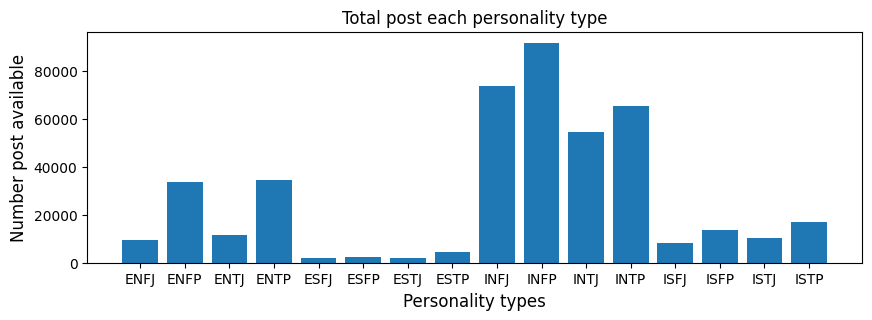

In [6]:
plt.figure(figsize = (10,3))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number post available', size = 12)
plt.title('Total post each personality type')

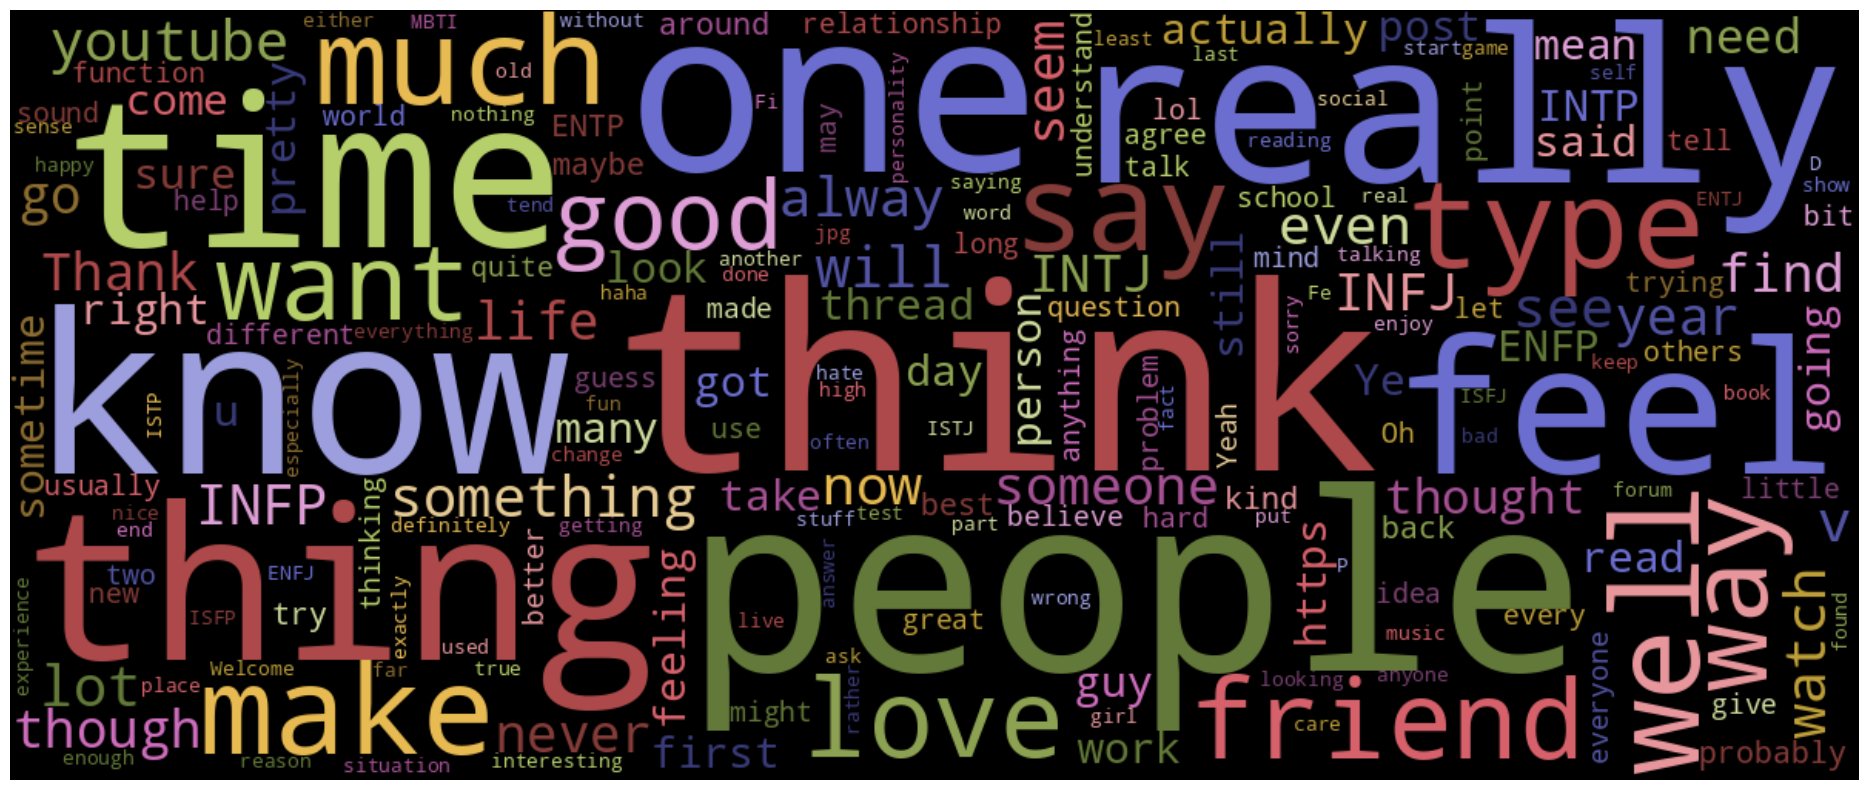

In [7]:
#Plotting WordCloud.

#Finding the most common words in all posts.
words = list(df1["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="Black", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

<ipython-input-8-9ba7709354c0>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k+1)


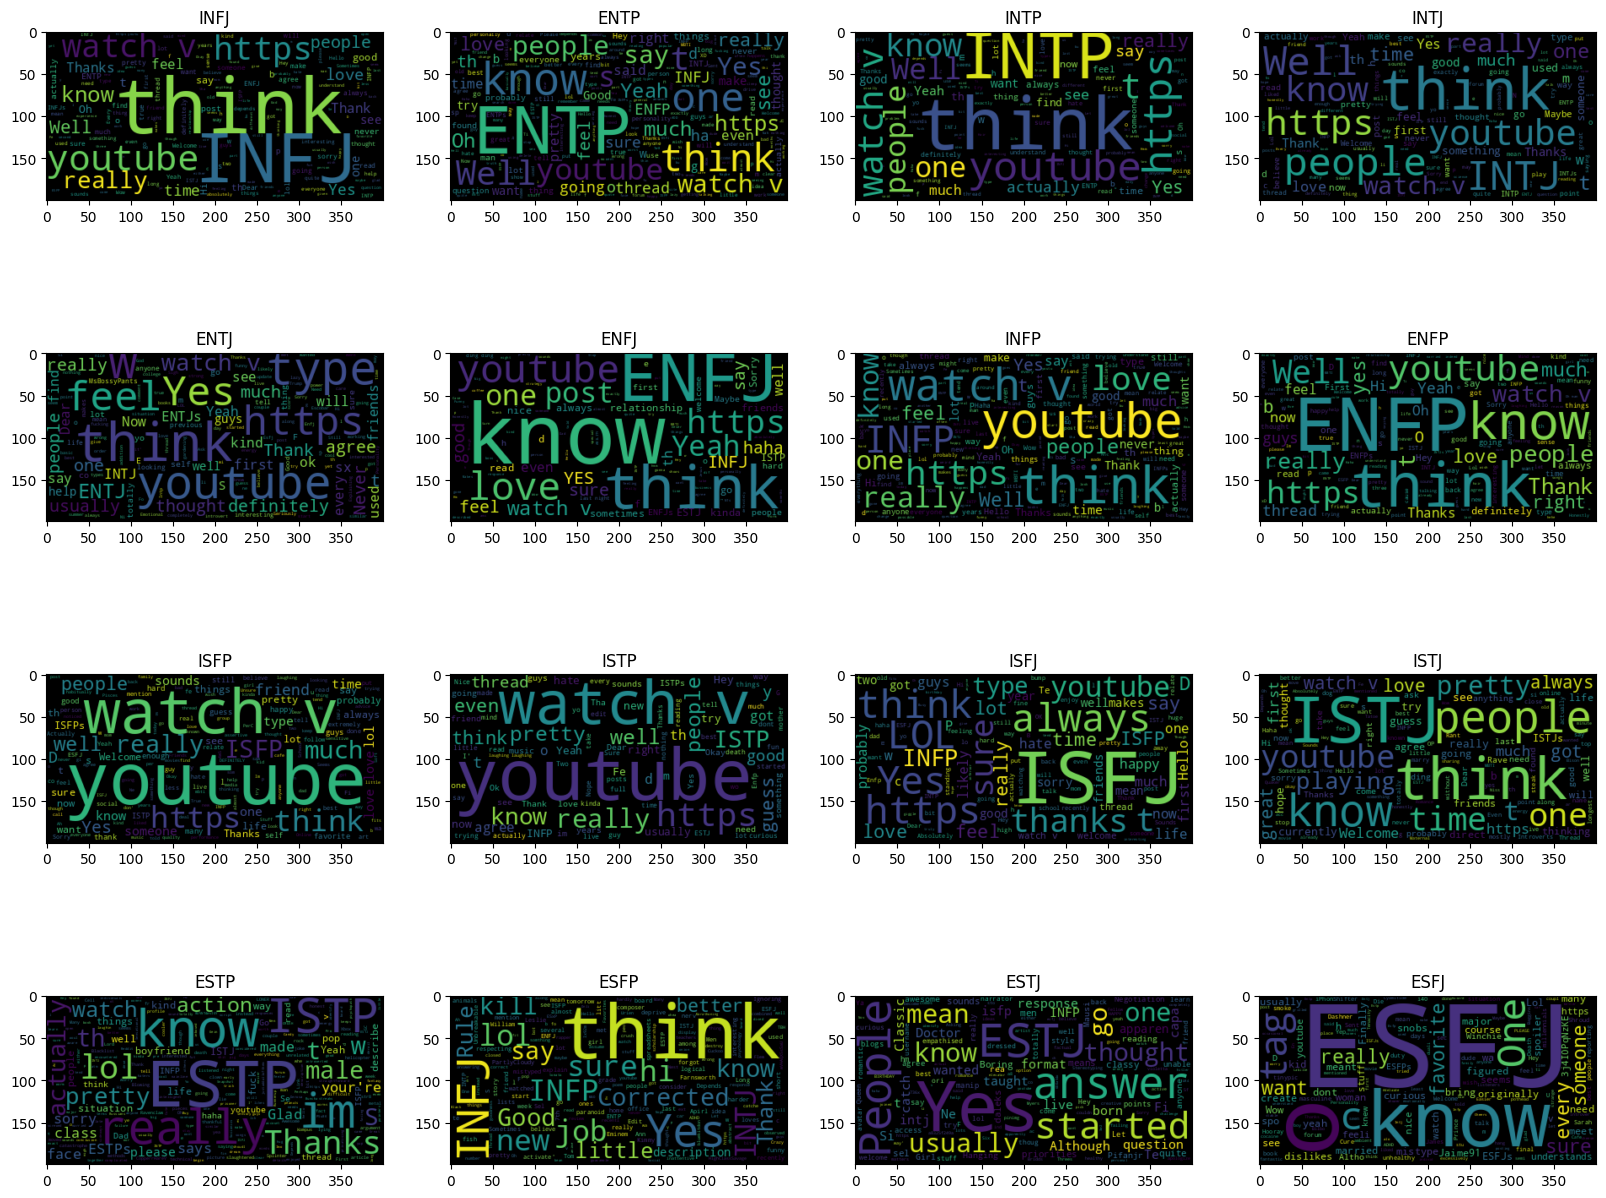

In [8]:
fig, ax = plt.subplots(len(df1['type'].unique()), sharex=True, figsize=(20,len(df1['type'].unique())))
k = 0
for i in df1['type'].unique():
    df_4 = df1[df1['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [9]:
df1.posts[8]

"I'm not sure, that's a good question. The distinction between the two is so dependant on perception. To quote Robb Flynn, ''The hate you feel is nothing more, than love you feel to win this war.''|||Good question! It's tough to say for sure but I loved Winona Ryder as Lydia in Beetlejuice...  http://i63.photobucket.com/albums/h158/trinsghost/Misc-Images/2921aa070866f20450f8e1160b1e5d41.jpg|||https://www.youtube.com/watch?v=r5If816MhoU|||https://www.youtube.com/watch?v=Q-sQklvpDhA|||I've been lonely for much of my time. For a while now I've been working on changing ''how to think'', and one way is trying to find the positive in everything, no matter how bleak it might seem. I...|||I hope I can look back at this current stretch of time and think, ''Thank God I'm not there anymore and things are so much better''. What an ass-kickin' I'm taking.|||Help or a voice of reason, other than my own distorted, in my life. I'm completely frusterated and feel like I'm on the brink. I'm carrying the

In [7]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

In [9]:
stop_words = stopwords.words('english')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df1)):
  review = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ',df1['posts'][i])
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower() 
  words = nltk.word_tokenize(review)
  words = [ps.stem(word) for word in words if word not in set(stop_words)]
  review = ' '.join(words)  
  corpus.append(review)

df1.posts = corpus



In [13]:
df1.posts[8]

'sure good question distinct two depend percept quot robb flynn hate feel noth love feel win war good question tough say sure love winona ryder lydia beetlejuic lone much time work chang think one way tri find posit everyth matter bleak might seem hope look back current stretch time think thank god anymor thing much better ass kickin take help voic reason distort life complet fruster feel like brink carri weight everyth neg ever life think post still feelin fleet thought acknowledg get lost depth love share one anoth could mundan thing everi simplest act make appreci told ocd awar obsess clean thing natur come understand affect thing obsess thought work song tri learn year hope finish new year still way go son anarchi first tv seri follow sinc x file way back day fleet big book person everi go stage forc read normal one book alway stand term interest read venu frustrat got best today lot late coupl heineken right feel bit better difficult time go bit got ta maintain find balanc get har

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer( ngram_range=(1, 1), max_features=5000)
Y = cv.fit_transform(corpus).toarray()

In [15]:
Y.shape

(8675, 5000)

In [10]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df1['new type'] = enc.fit_transform(df1['type'])

X = df1['new type']

In [11]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Y, X, test_size=0.2,  random_state=42)
print ((X_train.shape),(Y_train.shape),(X_test.shape),(Y_test.shape))

(6940, 5000) (6940,) (1735, 5000) (1735,)


In [13]:
ros = RandomOverSampler(random_state=42)
X_train_ros, Y_train_ros = ros.fit_resample(X_train, Y_train)

In [14]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
accuracies = {}
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [22]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train_smote, Y_train_smote)


MultinomialNB()

Accuracy: 49.97%
Accuracy: 50.86%
[[ 13   9   0   1   0   0   0   1   7   4   2   0   0   3   1   0]
 [  3  80   3   6   1   1   0   1  12   8   5   3   1   1   0   0]
 [  3   1  18   6   0   0   0   0   3   3   7   0   0   2   0   1]
 [  1  13   9  59   2   0   0   1  10   7  12  10   1   5   1   4]
 [  1   2   0   0   0   0   0   1   1   0   1   0   0   0   1   0]
 [  0   3   1   0   0   0   0   1   0   1   0   0   0   2   0   0]
 [  0   1   2   0   0   0   0   0   1   1   0   0   1   1   0   0]
 [  0   2   2   1   0   0   0   5   0   0   2   0   0   0   0   3]
 [  9  26   8  12   2   0   0   3 135  48  18   5   4  11   3   4]
 [ 17  39   7   5   4   1   0   1  35 205  14  13   1  19   4   5]
 [  3  10   7   8   2   2   0   3  15   8  98  23   1   5   3   5]
 [  1   8  11  16   1   1   1   2  15  24  31 155   1   9   2  15]
 [  2   4   1   0   1   0   0   0   5   4   1   1  19   5   1   1]
 [  3   3   2   0   0   0   0   0   1  14   1   1   0  25   1   2]
 [  1   2   5   1   1   0   

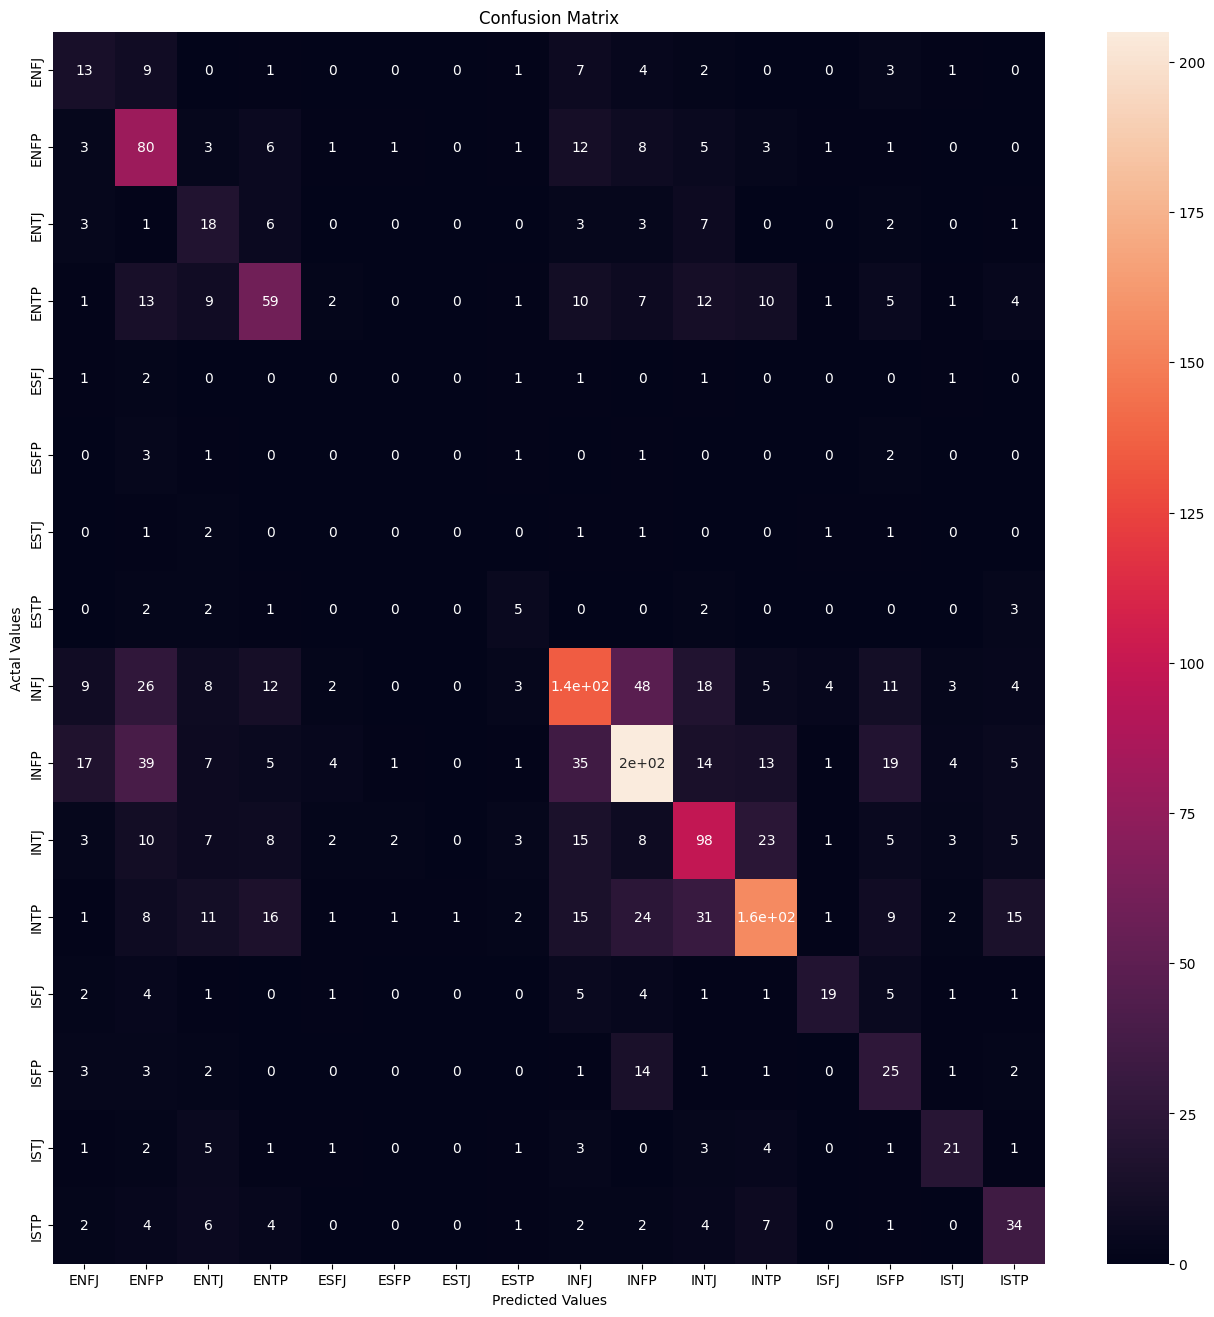

In [23]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train_ros, Y_train_ros)

Y_pred = NB.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

cm_df = pd.DataFrame(cm,
                     index = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                     columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'])

plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


Accuracy: 70.37%
Accuracy: 70.18%
[[ 18   4   0   0   0   0   0   0   7   5   2   2   0   1   2   0]
 [  1  81   2   5   0   0   0   1   6  14   9   4   0   0   1   1]
 [  2   1  28   5   0   0   0   0   1   1   6   0   0   0   0   0]
 [  0   6   5  90   1   0   1   0   7   4  10   9   0   2   0   0]
 [  0   0   0   2   2   0   0   0   0   1   0   1   0   0   1   0]
 [  0   2   2   1   0   0   0   0   0   0   0   1   0   2   0   0]
 [  0   0   1   1   0   0   3   0   1   1   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   7   0   0   0   4   0   0   0   3]
 [  1   6   5  10   0   0   0   0 193  33  15  15   0   6   2   2]
 [  4  13   1   7   3   0   0   0  15 291  10  15   1   4   1   5]
 [  0   3   4   3   2   2   1   0  12   7 138  16   0   1   3   1]
 [  0   1   1   8   1   0   0   1  10  13  10 237   0   2   1   8]
 [  1   0   1   1   1   0   0   0   4   3   1   2  29   1   0   1]
 [  0   1   1   1   0   0   1   0   3   8   1   4   0  31   1   1]
 [  1   1   0   1   0   0   

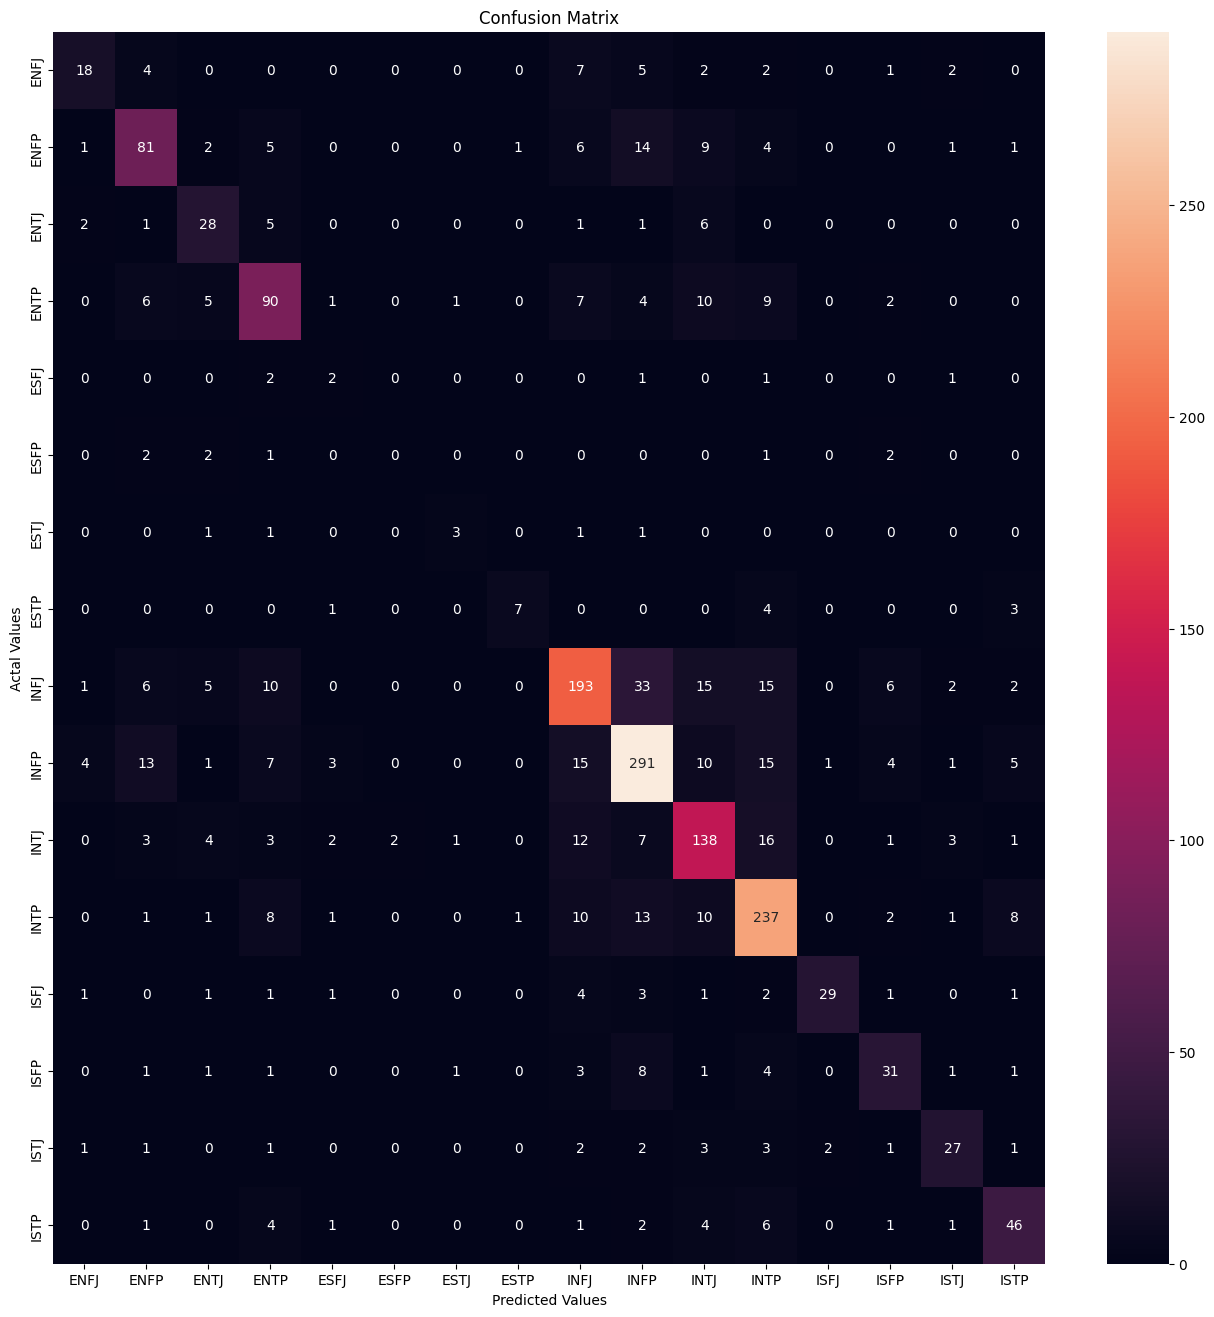

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
accuracies = {}
logreg = LogisticRegression(C=0.5, class_weight='balanced',
                            fit_intercept=True,intercept_scaling=1,
                            multi_class='ovr', n_jobs=-1)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

cm_df = pd.DataFrame(cm,
                     index = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                     columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'])

plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Accuracy: 60.23%
Accuracy: 59.02%
[[ 12   2   0   0   0   0   0   0   6  16   2   3   0   0   0   0]
 [  0  60   1   6   0   0   0   1  14  28   8   5   0   0   1   1]
 [  1   2  16   4   0   0   0   0   2   7   9   3   0   0   0   0]
 [  0   7   0  74   0   0   0   0   9  17   8  18   1   1   0   0]
 [  0   0   0   2   0   0   0   0   1   2   0   2   0   0   0   0]
 [  0   2   1   1   0   0   0   0   1   1   0   1   0   1   0   0]
 [  0   0   1   1   0   0   0   0   1   3   1   0   0   0   0   0]
 [  0   1   0   1   0   0   0   2   1   4   0   5   0   0   0   1]
 [  0   3   2   7   0   0   0   0 180  67  13  13   0   0   1   2]
 [  3   5   0   6   0   0   0   0  35 294   7  15   0   1   1   3]
 [  0   3   2   1   0   0   0   0  25  25 113  20   0   1   2   1]
 [  0   2   2   9   0   0   0   0  13  41  19 205   0   0   0   2]
 [  0   1   1   1   0   0   0   0   4  17   1   4  15   0   0   1]
 [  0   1   1   1   0   0   0   0   5  20   5   4   0  16   0   0]
 [  1   1   0   1   0   0   

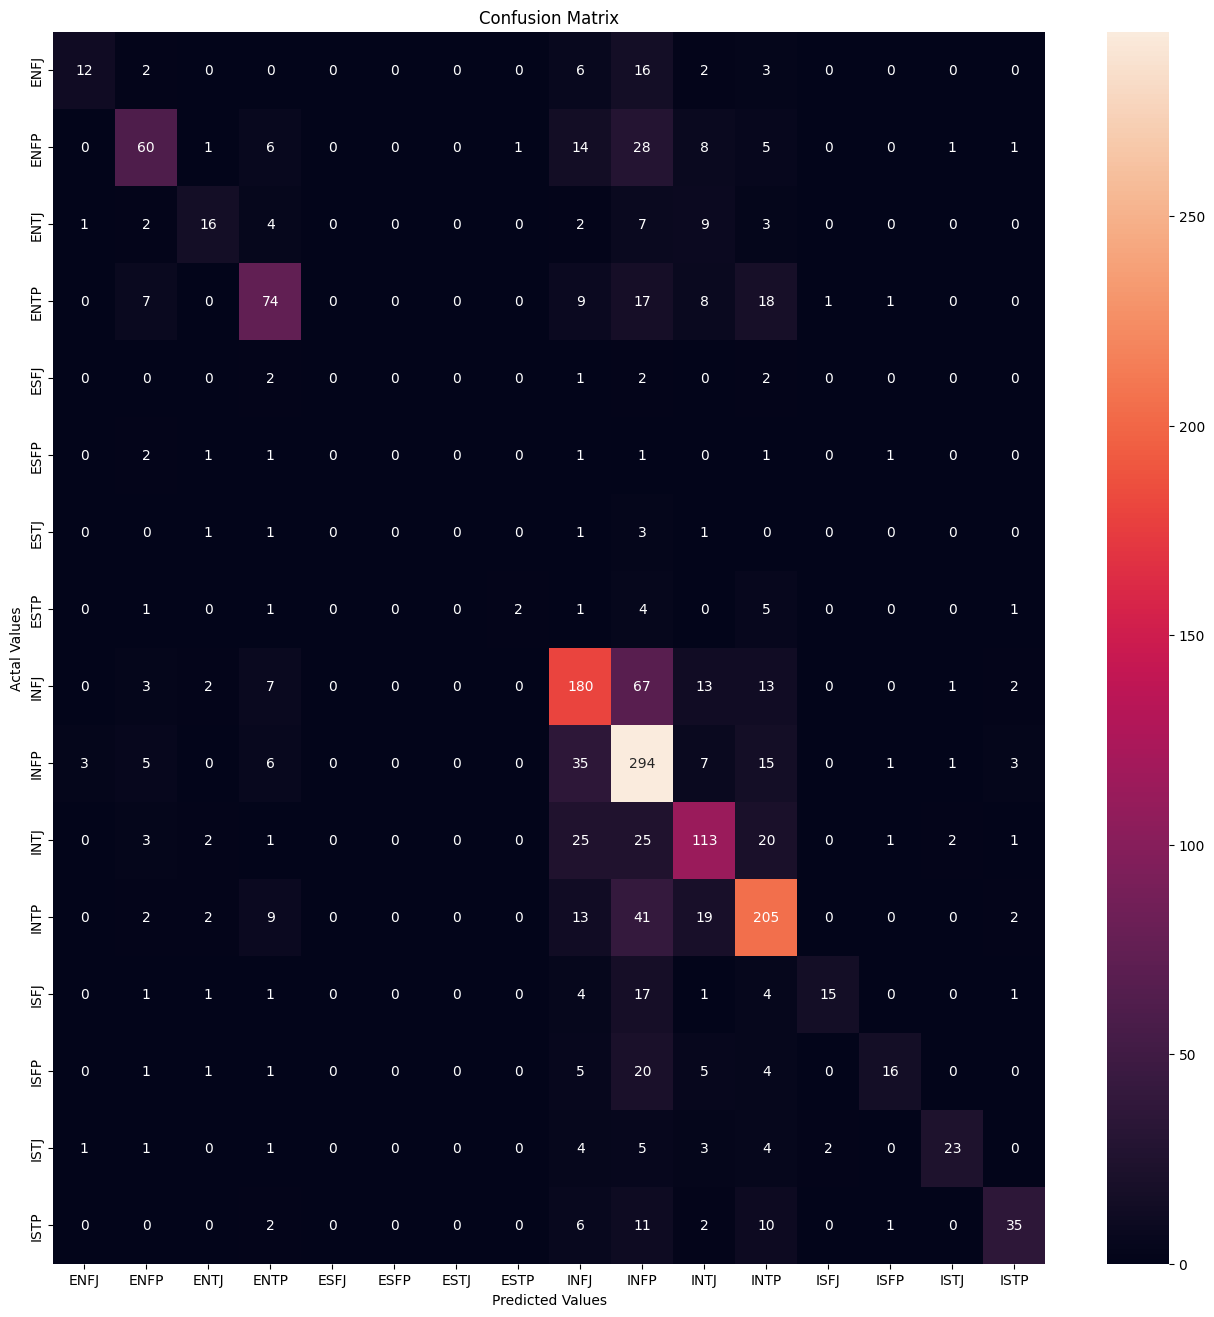

In [25]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(random_state=42, n_jobs=-1, bootstrap=True) 
                                      
model_forest.fit(X_train_ros,Y_train_ros)
Y_pred = model_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

cm_df = pd.DataFrame(cm,
                     index = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                     columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'])

plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [16]:
from xgboost import XGBClassifier
XGB = XGBClassifier()

In [ ]:

from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train_smote,Y_train_smote)

Y_pred = XGB.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

